In [90]:
#import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score, make_scorer
from time import time
from keras.preprocessing.sequence import pad_sequences

from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier, BaggingClassifier
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.externals import joblib
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [91]:
#@title Default title text
path = '/content/drive/My Drive/NLP Project/Input/'
clean_data = pd.read_csv(path+'cleanprojectdataset.csv')
scrapped = pd.read_csv(path+'labeled_tweets.csv')
public_data = pd.read_csv(path+'public_data_labeled.csv')
wiki_data_set = pd.read_csv(path+"toxic_train.csv")

In [92]:
scrapped.drop_duplicates(inplace=True)
scrapped.drop('id', axis = 'columns', inplace = True) # drops the id column


In [93]:
clean_data.drop_duplicates(inplace=True)
c = ["Text Label","Tweet"]
clean_data = clean_data.reindex(columns=c)
clean_data = clean_data.replace({"Non-Bullying":"Non-offensive","Bullying":"Offensive"})
clean_data = clean_data.rename(columns={"Text Label":"label","Tweet":"full_text"}) #standardizes the labels to fit other datasets labels


In [94]:
public_data.drop_duplicates(inplace=True)
wiki_data_set.drop_duplicates(inplace=True)
wiki_data_set.drop('Unnamed: 0', axis = 'columns', inplace = True)

wiki_data_set = wiki_data_set.replace(to_replace=0,value ='Non-offensive')
wiki_data_set = wiki_data_set.replace(to_replace=1,value ='Offensive')#standardizes the labels to fit other datasets labels


In [95]:
c = ["toxic","comment_text"]
wiki_data_set = wiki_data_set.reindex(columns=c)


In [96]:
wiki_data_set = wiki_data_set.rename(columns={"toxic":"label","comment_text":"full_text"})


Text(-0.35, 0, 'Total Tweets: 159571')

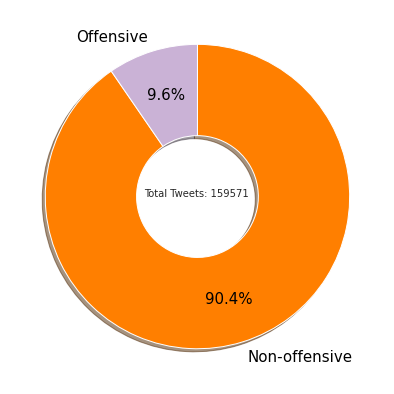

In [97]:
plt.figure(figsize = (7,7))
sorted_counts = wiki_data_set['label'].value_counts()
plt.pie(sorted_counts, labels = sorted_counts.index, startangle = 90, counterclock = False, wedgeprops = {'width' : 0.6},
       autopct='%1.1f%%', pctdistance = 0.7, textprops = {'color': 'black', 'fontsize' : 15}, shadow = True,
        colors = sns.color_palette("Paired")[7:])
plt.text(x = -0.35, y = 0, s = 'Total Tweets: {}'.format(wiki_data_set.shape[0]))
#plots the data sets breakdown


Text(-0.35, 0, 'Total Tweets: 11004')

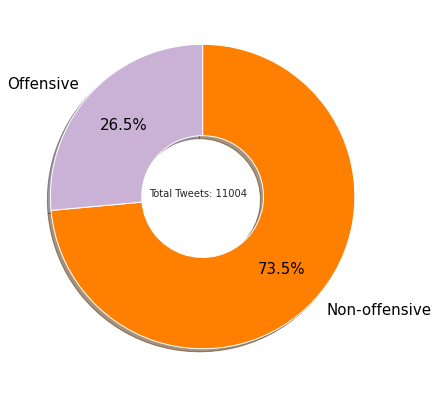

In [98]:
plt.figure(figsize = (7,7))
sorted_counts = scrapped['label'].value_counts()
plt.pie(sorted_counts, labels = sorted_counts.index, startangle = 90, counterclock = False, wedgeprops = {'width' : 0.6},
       autopct='%1.1f%%', pctdistance = 0.7, textprops = {'color': 'black', 'fontsize' : 15}, shadow = True,
        colors = sns.color_palette("Paired")[7:])
plt.text(x = -0.35, y = 0, s = 'Total Tweets: {}'.format(scrapped.shape[0]))


Text(-0.35, 0, 'Total Tweets: 24783')

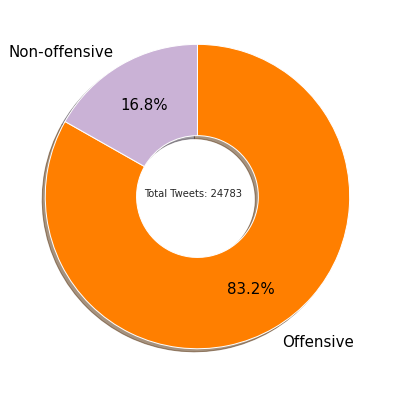

In [99]:
plt.figure(figsize = (7,7))
sorted_counts = public_data['label'].value_counts()
plt.pie(sorted_counts, labels = sorted_counts.index, startangle = 90, counterclock = False, wedgeprops = {'width' : 0.6},
       autopct='%1.1f%%', pctdistance = 0.7, textprops = {'color': 'black', 'fontsize' : 15}, shadow = True,
        colors = sns.color_palette("Paired")[7:])
plt.text(x = -0.35, y = 0, s = 'Total Tweets: {}'.format(public_data.shape[0]))


Text(-0.35, 0, 'Total Tweets: 1063')

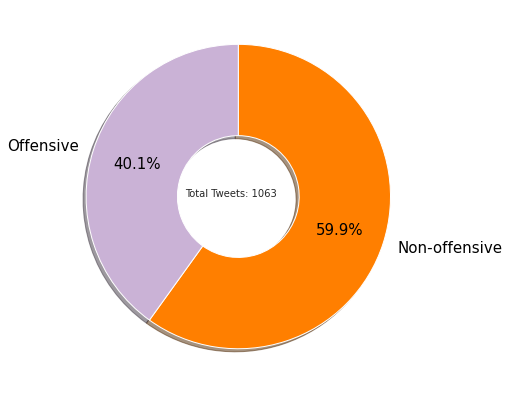

In [100]:
plt.figure(figsize = (7,7))
sorted_counts = clean_data['label'].value_counts()
plt.pie(sorted_counts, labels = sorted_counts.index, startangle = 90, counterclock = False, wedgeprops = {'width' : 0.6},
       autopct='%1.1f%%', pctdistance = 0.7, textprops = {'color': 'black', 'fontsize' : 15}, shadow = True,
        colors = sns.color_palette("Paired")[7:])
plt.text(x = -0.35, y = 0, s = 'Total Tweets: {}'.format(clean_data.shape[0]))


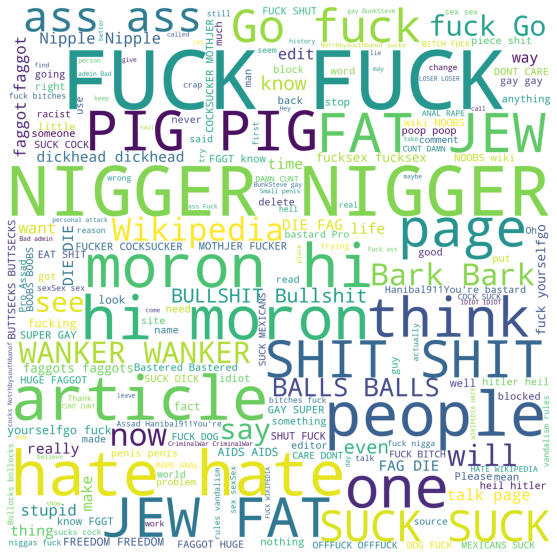

In [101]:
from wordcloud import WordCloud ,STOPWORDS
stopword = set(STOPWORDS)
subset = wiki_data_set[wiki_data_set.label=="Offensive"]
text = subset.full_text.values
wc = WordCloud(background_color="white",height=2500,width=2500,stopwords=stopword).generate(" ".join(text))

plt.figure(figsize=(20,10))
plt.axis("off")
plt.imshow(wc.recolor(colormap= 'viridis' , random_state=17), alpha=0.98)
plt.show()
#produces the word cloud for each dataset


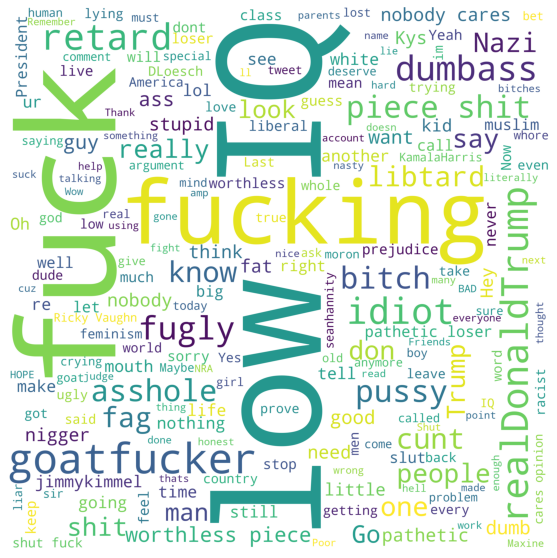

In [102]:
subset = clean_data[clean_data.label=="Offensive"]
text = subset.full_text.values
wc = WordCloud(background_color="white",height=2500,width=2500,stopwords=stopword).generate(" ".join(text))

plt.figure(figsize=(20,10))
plt.axis("off")
plt.imshow(wc.recolor(colormap= 'viridis' , random_state=17), alpha=0.98)
plt.show()

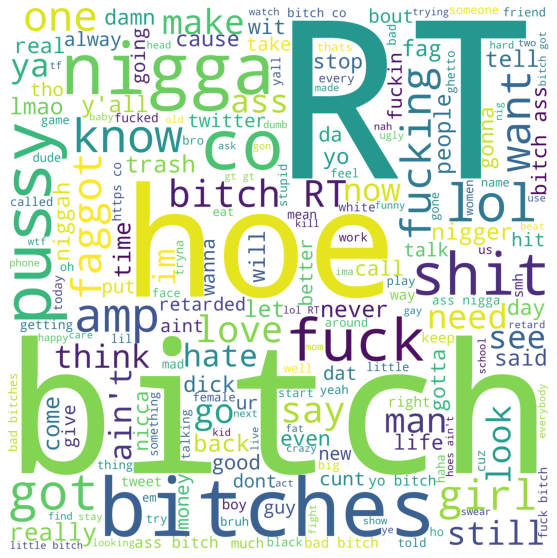

In [103]:
subset = public_data[public_data.label=="Offensive"]
text = subset.full_text.values
wc = WordCloud(background_color="white",height=2500,width=2500,stopwords=stopword).generate(" ".join(text))

plt.figure(figsize=(20,10))
plt.axis("off")
plt.imshow(wc.recolor(colormap= 'viridis' , random_state=17), alpha=0.98)
plt.show()

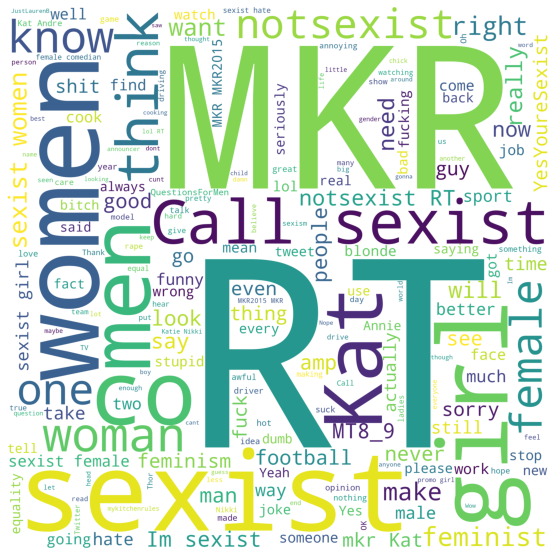

In [104]:
subset = scrapped[scrapped.label=="Offensive"]
text = subset.full_text.values
wc = WordCloud(background_color="white",height=2500,width=2500,stopwords=stopword).generate(" ".join(text))

plt.figure(figsize=(20,10))
plt.axis("off")
plt.imshow(wc.recolor(colormap= 'viridis' , random_state=17), alpha=0.98)
plt.show()

In [105]:
def roc_auc(predictions,target):
    '''
    This methods returns the AUC Score when given the Predictions
    and Labels
    '''
    
    fpr, tpr, thresholds = metrics.roc_curve(target, predictions)
    roc_auc = metrics.auc(fpr, tpr)
    return roc_auc

In [106]:
from sklearn.feature_extraction.text import TfidfVectorizer
import re
def model_split(df): #splits the model in testing and traing data

  df['label'] = df.label.map({'Offensive': 1, 'Non-offensive': 0})

  xtrain, xvalid, ytrain, yvalid = train_test_split(df['full_text'], 
                                                    df['label'],
                                                  random_state=42, 
                                                  test_size=0.2, shuffle=True)
  print('Number of rows in the total set: {}'.format(df.shape[0]))
  print('Number of rows in the training set: {}'.format(xtrain.shape[0]))
  print('Number of rows in the test set: {}'.format(xvalid.shape[0]))
  return xtrain,xvalid,ytrain,yvalid

  

def model_train(xtrain,xvalid,ytrain,yvalid):
  word_vectorizer = TfidfVectorizer(
      sublinear_tf=True,
      strip_accents='unicode',
      analyzer='word',
      token_pattern=r'\w{1,}',
      stop_words='english',
      ngram_range=(1, 1),
      max_features=10000)
  word_vectorizer.fit(xtrain)
  training_data = word_vectorizer.transform(xtrain)
  testing_data = word_vectorizer.transform(xvalid)
  

  
  models = [MultinomialNB(),  
         LogisticRegression()]
  re = pipeline(models, training_data, ytrain, testing_data, yvalid)
  results = pd.DataFrame(re)
  results = results.reindex(columns = ['Algorithm', 'Accuracy: Test', 'Precision: Test', 'Recall: Test', 'F1 Score: Test', 'Prediction Time',
                            'Accuracy: Train', 'Precision: Train', 'Recall: Train', 'F1 Score: Train','Roc Score: Train','Roc Score: Test', 'Training Time'])
  
  results.sort_values(by = 'F1 Score: Test', inplace = True, ascending = False)
  results.reset_index(drop = True)
  return results

  



In [107]:
from sklearn.metrics import roc_auc_score
def pipeline(learner_list, X_train, y_train, X_test, y_test): 
    '''
    inputs:
       - learner: the learning algorithm to be trained and predicted on
       - X_train: features training set
       - y_train: income training set
       - X_test: features testing set
       - y_test: income testing set
    '''
    
    # Get length of Training Data:
    size = len(y_train)
    
    results = {}
    final_results = []
    
    for learner in learner_list:
        
        # Store the learner name:
        results['Algorithm'] = learner.__class__.__name__

        # Fit the learner:
        start = time() # Get start time
        print("Training {}".format(learner.__class__.__name__))
        learner = learner.fit(X_train, y_train)
        end = time() # Get end time

        # Store the training time
        results['Training Time'] = end - start

        start = time() # Get start time
        predictions_test = learner.predict(X_test)
        predictions_train = learner.predict(X_train)
        end = time() # Get end time

        # Store the prediction time
        results['Prediction Time'] = end - start

        # Compute the Accuracy on Test Set
        results['Accuracy: Test'] = accuracy_score(y_test, predictions_test)

        # Compute the Accuracy on Training Set
        results['Accuracy: Train'] = accuracy_score(y_train, predictions_train)

        # Compute the F1 Score on Test Set
        results['F1 Score: Test'] = f1_score(y_test, predictions_test)

        # Compute the F1 Score on Training Set
        results['F1 Score: Train'] = f1_score(y_train, predictions_train)

        results['Roc Score: Train'] = roc_auc_score(y_train, predictions_train)
        results['Roc Score: Test'] = roc_auc_score(y_test, predictions_test)

        # Compute the Precision on Test Set
        results['Precision: Test'] = precision_score(y_test, predictions_test)

        # Compute the Precision on Training Set
        results['Precision: Train'] = precision_score(y_train, predictions_train)

        # Compute the Recall on Test Set
        results['Recall: Test'] = recall_score(y_test, predictions_test)

        # Compute the Recall on Training Set
        results['Recall: Train'] = recall_score(y_train, predictions_train)

        # Success
        print("Training {} finished in {:.2f} sec".format(learner.__class__.__name__, results['Training Time']))
        print('----------------------------------------------------')
        
        final_results.append(results.copy())
    # Return a dataframe of the results
    return final_results

In [108]:
from time import time
wiki_xtrain,wiki_xvalid,wiki_ytrain,wiki_yvalid = model_split(wiki_data_set)
scrapped_xtrain,scrapped_xvalid,scrapped_ytrain,scrapped_yvalid = model_split(scrapped)
public_xtrain,public_xvalid,public_ytrain,public_yvalid = model_split(public_data)
clean_xtrain,clean_xvalid,clean_ytrain,clean_yvalid = model_split(clean_data)
results = model_train(wiki_xtrain,scrapped['full_text'],wiki_ytrain,scrapped['label'])
results


Number of rows in the total set: 159571
Number of rows in the training set: 127656
Number of rows in the test set: 31915
Number of rows in the total set: 11004
Number of rows in the training set: 8803
Number of rows in the test set: 2201
Number of rows in the total set: 24783
Number of rows in the training set: 19826
Number of rows in the test set: 4957
Number of rows in the total set: 1063
Number of rows in the training set: 850
Number of rows in the test set: 213
Training MultinomialNB
Training MultinomialNB finished in 0.04 sec
----------------------------------------------------
Training LogisticRegression
Training LogisticRegression finished in 3.15 sec
----------------------------------------------------


,Algorithm,Accuracy: Test,Precision: Test,Recall: Test,F1 Score: Test,Prediction Time,Accuracy: Train,Precision: Train,Recall: Train,F1 Score: Train,Roc Score: Train,Roc Score: Test,Training Time
0,MultinomialNB,0.731098,0.473510,0.147372,0.224784,0.023807,0.952443,0.932529,0.543226,0.686529,0.769529,0.544216,0.044363
1,LogisticRegression,0.713922,0.387464,0.140158,0.205853,0.015251,0.960848,0.931775,0.638340,0.757637,0.816692,0.530230,3.154972


In [109]:
results = model_train(wiki_xtrain,wiki_data_set['full_text'],wiki_ytrain,wiki_data_set['label'])
results

Training MultinomialNB
Training MultinomialNB finished in 0.05 sec
----------------------------------------------------
Training LogisticRegression
Training LogisticRegression finished in 3.12 sec
----------------------------------------------------


,Algorithm,Accuracy: Test,Precision: Test,Recall: Test,F1 Score: Test,Prediction Time,Accuracy: Train,Precision: Train,Recall: Train,F1 Score: Train,Roc Score: Train,Roc Score: Test,Training Time
1,LogisticRegression,0.960181,0.928079,0.633647,0.753108,0.032276,0.960848,0.931775,0.638340,0.757637,0.816692,0.814221,3.120149
0,MultinomialNB,0.951877,0.930275,0.538250,0.681937,0.050460,0.952443,0.932529,0.543226,0.686529,0.769529,0.766987,0.046883


In [110]:
results = model_train(wiki_xtrain,clean_data['full_text'],wiki_ytrain,clean_data['label'])
results


Training MultinomialNB
Training MultinomialNB finished in 0.04 sec
----------------------------------------------------
Training LogisticRegression
Training LogisticRegression finished in 3.02 sec
----------------------------------------------------


,Algorithm,Accuracy: Test,Precision: Test,Recall: Test,F1 Score: Test,Prediction Time,Accuracy: Train,Precision: Train,Recall: Train,F1 Score: Train,Roc Score: Train,Roc Score: Test,Training Time
1,LogisticRegression,0.671684,0.589327,0.596244,0.592765,0.013915,0.960848,0.931775,0.638340,0.757637,0.816692,0.659190,3.020619
0,MultinomialNB,0.682973,0.612658,0.568075,0.589525,0.018623,0.952443,0.932529,0.543226,0.686529,0.769529,0.663943,0.044169


In [111]:
results = model_train(wiki_xtrain,public_data['full_text'],wiki_ytrain,public_data['label'])
results

Training MultinomialNB
Training MultinomialNB finished in 0.05 sec
----------------------------------------------------
Training LogisticRegression
Training LogisticRegression finished in 3.10 sec
----------------------------------------------------


,Algorithm,Accuracy: Test,Precision: Test,Recall: Test,F1 Score: Test,Prediction Time,Accuracy: Train,Precision: Train,Recall: Train,F1 Score: Train,Roc Score: Train,Roc Score: Test,Training Time
0,MultinomialNB,0.761409,0.983115,0.725703,0.835021,0.021753,0.952443,0.932529,0.543226,0.686529,0.769529,0.831984,0.045097
1,LogisticRegression,0.703264,0.983173,0.654559,0.785897,0.015500,0.960848,0.931775,0.638340,0.757637,0.816692,0.799535,3.103556


In [112]:
results = model_train(public_xtrain,wiki_data_set['full_text'],public_ytrain,wiki_data_set['label'])
results

Training MultinomialNB
Training MultinomialNB finished in 0.01 sec
----------------------------------------------------
Training LogisticRegression
Training LogisticRegression finished in 0.53 sec
----------------------------------------------------


,Algorithm,Accuracy: Test,Precision: Test,Recall: Test,F1 Score: Test,Prediction Time,Accuracy: Train,Precision: Train,Recall: Train,F1 Score: Train,Roc Score: Train,Roc Score: Test,Training Time
1,LogisticRegression,0.216531,0.107191,0.978881,0.193223,0.033272,0.968072,0.973102,0.988968,0.980971,0.926726,0.557299,0.526630
0,MultinomialNB,0.212564,0.106914,0.981300,0.192821,0.024956,0.907243,0.901638,0.997333,0.947075,0.728985,0.556187,0.008893


In [113]:
results = model_train(public_xtrain,public_data['full_text'],public_ytrain,public_data['label'])
results

Training MultinomialNB
Training MultinomialNB finished in 0.01 sec
----------------------------------------------------
Training LogisticRegression
Training LogisticRegression finished in 0.50 sec
----------------------------------------------------


,Algorithm,Accuracy: Test,Precision: Test,Recall: Test,F1 Score: Test,Prediction Time,Accuracy: Train,Precision: Train,Recall: Train,F1 Score: Train,Roc Score: Train,Roc Score: Test,Training Time
1,LogisticRegression,0.961748,0.968069,0.986566,0.977230,0.002884,0.968072,0.973102,0.988968,0.980971,0.926726,0.912692,0.503615
0,MultinomialNB,0.900496,0.895202,0.997139,0.943425,0.003803,0.907243,0.901638,0.997333,0.947075,0.728985,0.709475,0.007257


In [114]:
results = model_train(public_xtrain,clean_data['full_text'],public_ytrain,clean_data['label'])
results

Training MultinomialNB
Training MultinomialNB finished in 0.01 sec
----------------------------------------------------
Training LogisticRegression
Training LogisticRegression finished in 0.57 sec
----------------------------------------------------


,Algorithm,Accuracy: Test,Precision: Test,Recall: Test,F1 Score: Test,Prediction Time,Accuracy: Train,Precision: Train,Recall: Train,F1 Score: Train,Roc Score: Train,Roc Score: Test,Training Time
0,MultinomialNB,0.417686,0.407301,0.995305,0.578050,0.003227,0.907243,0.901638,0.997333,0.947075,0.728985,0.513351,0.012162
1,LogisticRegression,0.418627,0.406977,0.985915,0.576132,0.001796,0.968072,0.973102,0.988968,0.980971,0.926726,0.512581,0.568545


In [115]:
results = model_train(public_xtrain,scrapped['full_text'],public_ytrain,scrapped['label'])
results

Training MultinomialNB
Training MultinomialNB finished in 0.01 sec
----------------------------------------------------
Training LogisticRegression
Training LogisticRegression finished in 0.53 sec
----------------------------------------------------


,Algorithm,Accuracy: Test,Precision: Test,Recall: Test,F1 Score: Test,Prediction Time,Accuracy: Train,Precision: Train,Recall: Train,F1 Score: Train,Roc Score: Train,Roc Score: Test,Training Time
1,LogisticRegression,0.344693,0.279578,0.936791,0.430636,0.001972,0.968072,0.973102,0.988968,0.980971,0.926726,0.534255,0.527210
0,MultinomialNB,0.272537,0.265297,0.989007,0.418368,0.002979,0.907243,0.901638,0.997333,0.947075,0.728985,0.501917,0.008127


In [116]:
results = model_train(scrapped_xtrain,scrapped['full_text'],scrapped_ytrain,scrapped['label'])
results

Training MultinomialNB
Training MultinomialNB finished in 0.01 sec
----------------------------------------------------
Training LogisticRegression
Training LogisticRegression finished in 0.27 sec
----------------------------------------------------


,Algorithm,Accuracy: Test,Precision: Test,Recall: Test,F1 Score: Test,Prediction Time,Accuracy: Train,Precision: Train,Recall: Train,F1 Score: Train,Roc Score: Train,Roc Score: Test,Training Time
0,MultinomialNB,0.885314,0.963984,0.588458,0.730802,0.002455,0.895490,0.971906,0.623338,0.759540,0.808424,0.790275,0.008828
1,LogisticRegression,0.880134,0.927497,0.593267,0.723654,0.001457,0.884358,0.936793,0.604033,0.734481,0.794677,0.788293,0.272926


In [ ]:
results = model_train(scrapped_xtrain,wiki_data_set['full_text'],scrapped_ytrain,wiki_data_set['label'])
results

In [ ]:
results = model_train(scrapped_xtrain,clean_data['full_text'],scrapped_ytrain,clean_data['label'])
results

In [ ]:
results = model_train(scrapped_xtrain,public_data['full_text'],scrapped_ytrain,public_data['label'])
results

In [ ]:
results = model_train(clean_xtrain,public_data['full_text'],clean_ytrain,public_data['label'])
results

In [ ]:
results = model_train(clean_xtrain,wiki_data_set['full_text'],clean_ytrain,wiki_data_set['label'])
results

In [ ]:
results = model_train(clean_xtrain,clean_data['full_text'],clean_ytrain,clean_data['label'])
results

In [ ]:
results = model_train(clean_xtrain,scrapped['full_text'],clean_ytrain,scrapped['label'])
results